In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm
import cartopy.crs as ccrs
import geopandas as gpd
from shapely.geometry import Point
from geopy.extra.rate_limiter import RateLimiter

In [2]:
df = pd.read_csv(r"C:\Users\HP Notebook\Desktop\airbnb data\Airbnb_data.csv")


In [3]:
df.dropna(inplace=True)  # Drops rows with missing values
df = df[(df != 0).any(axis=1)]

In [4]:
df=df.rename(columns={'id':'listing_id'})

In [5]:
gdf = gpd.read_file(r'C:\Users\HP Notebook\Desktop\airbnb data\map.geojson (1).json')

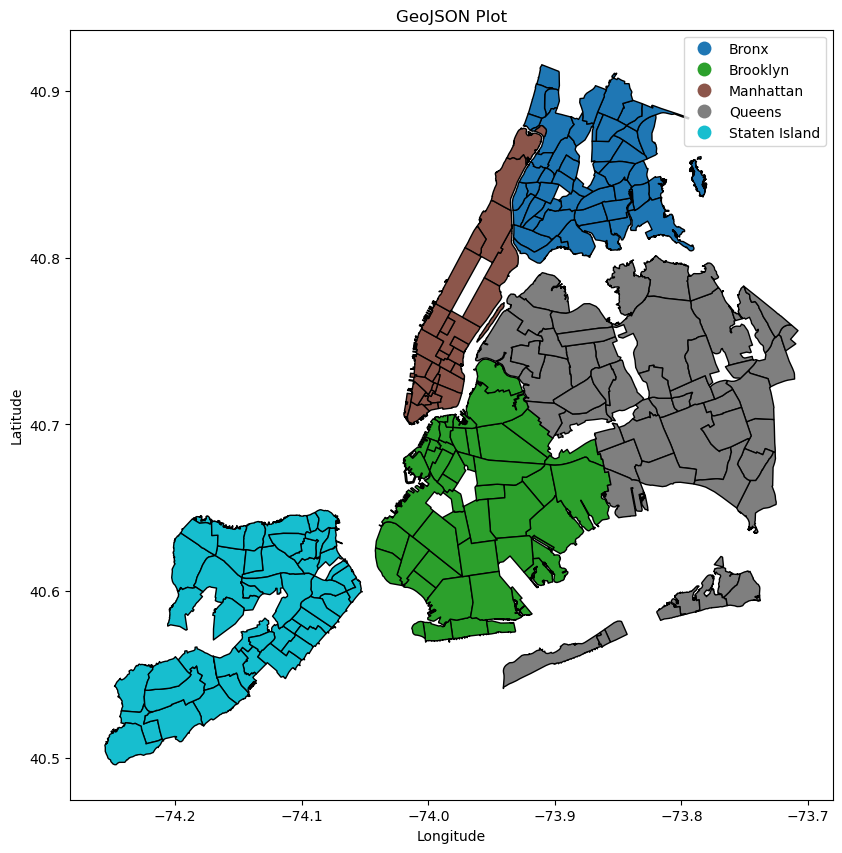

In [6]:
ax = gdf.plot(column="neighbourhood_group",categorical=True,legend=True,figsize=(15, 10), edgecolor='black')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GeoJSON Plot')
plt.show()

In [18]:
gdf['neighbourhood_grp_listing_count']=gdf['neighbourhood_group']+'='+gdf['listings_count'].astype(str)


In [19]:
gdf

,neighbourhood,neighbourhood_group,geometry,listings_count,neighbourhood_grp_listing_count
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...",4572,Queens=4572
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",875,Bronx=875
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...",875,Bronx=875
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ...",4572,Queens=4572
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ...",4572,Queens=4572
...,...,...,...,...,...
228,Westchester Square,Bronx,"MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ...",875,Bronx=875
229,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ...",314,Staten Island=314
230,Williamsbridge,Bronx,"MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ...",875,Bronx=875
231,Williamsburg,Brooklyn,"MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ...",16439,Brooklyn=16439


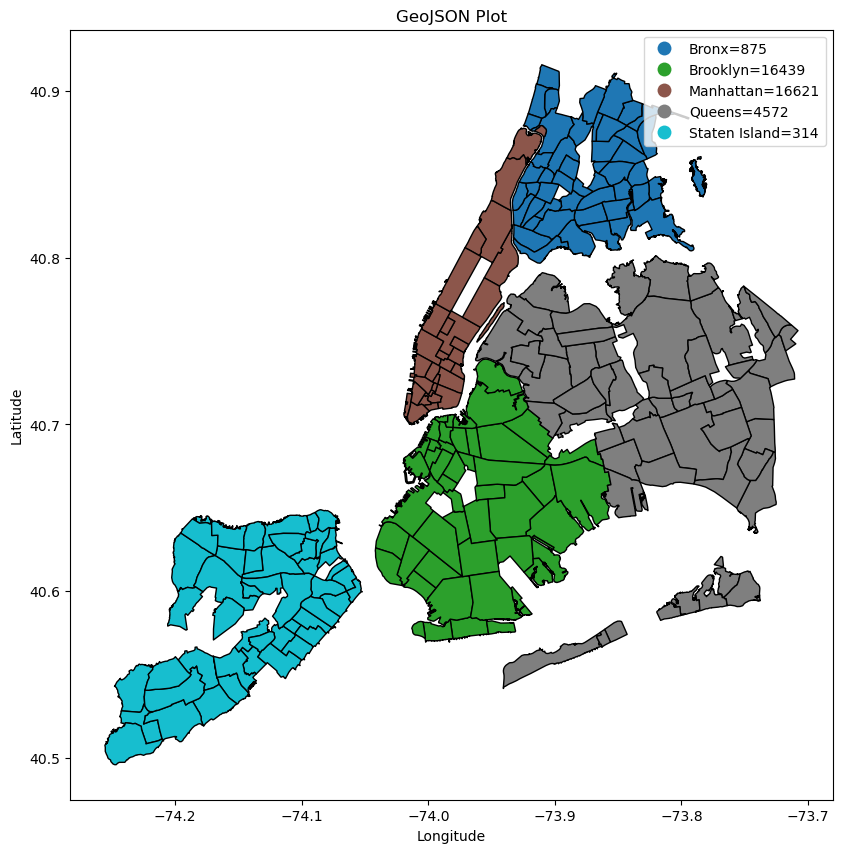

In [20]:
ax = gdf.plot(column="neighbourhood_grp_listing_count",categorical=True,legend=True,figsize=(15, 10), edgecolor='black')

# Add labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('GeoJSON Plot')
plt.show()

In [7]:
# Group by 'neighbourhood_group' to get the count of listings
listings_count = df.groupby('neighbourhood_group')['listing_id'].count().reset_index()
listings_count = listings_count.rename(columns={'listing_id': 'listings_count'})

# Merge count information back into the GeoDataFrame
gdf = gdf.merge(listings_count, on='neighbourhood_group', how='left')
gdf

,neighbourhood,neighbourhood_group,geometry,listings_count
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...",4572
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",875
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...",875
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ...",4572
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ...",4572
...,...,...,...,...
228,Westchester Square,Bronx,"MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ...",875
229,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ...",314
230,Williamsbridge,Bronx,"MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ...",875
231,Williamsburg,Brooklyn,"MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ...",16439
